## **Prediction of Coffee Quality Rating**
*By Maria Ogamba, 100060*



#### **Table of Contents**

* [Summary of Results](#sum)
* [Introduction](#intro)
* [Data Preprocessing and Exploratory Analysis](#pe) 
    * [3.1 Data Cleaning](#clean)
    * [3.2 Exploratory Data Analysis](#eda)
* [Data Modelling](#model) 
    * [4.1 Regression](#reg)
    * [4.2 Classification](#class)
* [Critique, Limitations and Future Improvements](#clf)
* [References](#ref)

#### **Summary of Results** <a class="anchor" id="sum"></a>

The analysis in this notebooks sought to find a supervised machine learning model that can predict the quality of a cup of Arabica coffee using the characteristics of the Coffee Quality Dataset gathered by the Coffee Quality Institute (Mock, n.d.) in January 2018.

The analysis was changed to use classification models and reprocessed the data after investigating Ridge and Random Forest regression algorithms. From the study below, one can see that it was challenging to forecast a continuous target variable since it had a lot of non-linear aspects and was hard to understand in terms of the prediction being attempted. These problems were resolved by creating a new variable from the target variable and classifying it into "Good" and "Bad" categories based on a threshold from the median.

With a ROC score of 0.67, the final model, which used Random Forest Classification, performed averagely on an unknown test data set. Although improperly categorizing the quality of coffee might have a significant economic impact, more research is adviced to enhance the prediction model before it is put to any use. This is discussed further at the conclusion of our analysis.

#### **Introduction** <a class="anchor" id="intro"></a>

Coffee is one of the most consumed drinks in the world, making it a truly global enterprise. Despite obstacles that have badly impacted other businesses, such the COVID-19 epidemic, its extremely significant economic effect keeps expanding year after year. Around 1.6% of the US GDP and 1.7 million employment are directly related to the coffee business, and 76% of Americans said they drank coffee in 2015. Although these statistics appear significant, it is unclear who stands to gain from them. (Association, n.d.). The makers of coffee have a notoriously poor track record, frequently from underprivileged backgrounds, and grappling with fair trade and sustainability difficulties (Diepenbrock 2015).

This analysis explores the possibility of developing a model that can accurately forecast coffee quality. We could envision it being beneficial to coffee farmers if it can accomplish this efficiently. While we acknowledge that coffee's success is due to more factors than its quality, having access to this information could help coffee's actual growers distinguish and perfect their crop and validate their product's quality without facing additional obstacles like the cost of national board certification.

#### **Data Cleaning and Exploratory Data Analysis** <a class="anchor" id="pe"></a>

The data is collected on Arabica coffee beans from across the world and professionally rated on a 0-100 scale based on factors like acidity, sweetness, fragrance, balance, etc. The dataset also contains information about coffee bean origin country, harvesting and grading date, colour, defects, processing and packaging details.

Further cleaning was performed on this dataset to remove all variables except `total_cup_points`, our target variable, and our feature variables: `country_of_origin`, `region`, `harvest_year`, `processing_method`, `moisture`, `category_one_defects`, `quakers`, `color`, `category_two_defects`, and `altitude_mean_meters`. The original variable `region` was transformed and re-organized to reflect the industry recognized coffee growing-regions: East Africa and the Arabian Peninsula, Southeast Asia and the Pacific, and Latin America (Co., n.d.). Additional cleaning was performed to remove erroneous outliers from the data.

In [1]:
# ---- Imports ----
import pandas as pd
import re
import seaborn as sns
import numpy as np
import plotly.express as px
from sklearn.model_selection import train_test_split, RandomizedSearchCV, cross_val_score, cross_validate
from sklearn.preprocessing import OneHotEncoder, OrdinalEncoder, StandardScaler
from sklearn.ensemble import RandomForestRegressor, RandomForestClassifier
from sklearn.linear_model import Ridge
import altair as alt
import matplotlib.pyplot as plt
from sklearn.compose import ColumnTransformer, make_column_transformer
from sklearn.pipeline import Pipeline, make_pipeline
import warnings
warnings.filterwarnings('ignore')

In [2]:
# ---- Create dataframe and show the first 5 rows ----
df = pd.read_csv('merged_data_cleaned.csv')
df.head()

,Index,Species,Owner,Country_of_Origin,Farm_Name,Lot_Number,Mill,ICO_Number,Company,Altitude,...,Color,Category_Two_Defects,Expiration,Certification_Body,Certification_Address,Certification_Contact,unit_of_measurement,altitude_low_meters,altitude_high_meters,altitude_mean_meters
0,0,Arabica,metad plc,Ethiopia,metad plc,NaN,metad plc,2014/2015,metad agricultural developmet plc,1950-2200,...,Green,0,"April 3rd, 2016",METAD Agricultural Development plc,309fcf77415a3661ae83e027f7e5f05dad786e44,19fef5a731de2db57d16da10287413f5f99bc2dd,m,1950.0,2200.0,2075.0
1,1,Arabica,metad plc,Ethiopia,metad plc,NaN,metad plc,2014/2015,metad agricultural developmet plc,1950-2200,...,Green,1,"April 3rd, 2016",METAD Agricultural Development plc,309fcf77415a3661ae83e027f7e5f05dad786e44,19fef5a731de2db57d16da10287413f5f99bc2dd,m,1950.0,2200.0,2075.0
2,2,Arabica,grounds for health admin,Guatemala,"san marcos barrancas ""san cristobal cuch",NaN,NaN,NaN,NaN,1600 - 1800 m,...,NaN,0,"May 31st, 2011",Specialty Coffee Association,36d0d00a3724338ba7937c52a378d085f2172daa,0878a7d4b9d35ddbf0fe2ce69a2062cceb45a660,m,1600.0,1800.0,1700.0
3,3,Arabica,yidnekachew dabessa,Ethiopia,yidnekachew dabessa coffee plantation,NaN,wolensu,NaN,yidnekachew debessa coffee plantation,1800-2200,...,Green,2,"March 25th, 2016",METAD Agricultural Development plc,309fcf77415a3661ae83e027f7e5f05dad786e44,19fef5a731de2db57d16da10287413f5f99bc2dd,m,1800.0,2200.0,2000.0
4,4,Arabica,metad plc,Ethiopia,metad plc,NaN,metad plc,2014/2015,metad agricultural developmet plc,1950-2200,...,Green,2,"April 3rd, 2016",METAD Agricultural Development plc,309fcf77415a3661ae83e027f7e5f05dad786e44,19fef5a731de2db57d16da10287413f5f99bc2dd,m,1950.0,2200.0,2075.0


In [3]:
# ---- View the data types of each column ----
df.dtypes

Index                      int64
Species                   object
Owner                     object
Country_of_Origin         object
Farm_Name                 object
Lot_Number                object
Mill                      object
ICO_Number                object
Company                   object
Altitude                  object
Region                    object
Producer                  object
Number_of_Bags             int64
Bag_Weight                object
In_Country_Partner        object
Harvest_Year              object
Grading_Date              object
Owner_1                   object
Variety                   object
Processing_Method         object
Aroma                    float64
Flavor                   float64
Aftertaste               float64
Acidity                  float64
Body                     float64
Balance                  float64
Uniformity               float64
Clean_Cup                float64
Sweetness                float64
Cupper_Points            float64
Total_Cup_

In [4]:
# ---- View number of rows and columns ----
df.shape

(1339, 44)

#### 3.1 Data Cleaning <a class="anchor" id="clean"></a>

In [5]:
# ---- View the Country column values ----
df.Country_of_Origin.value_counts()

Mexico                          236
Colombia                        183
Guatemala                       181
Brazil                          132
Taiwan                           75
United States (Hawaii)           73
Honduras                         53
Costa Rica                       51
Ethiopia                         44
Tanzania, United Republic Of     40
Uganda                           36
Thailand                         32
Nicaragua                        26
Kenya                            25
El Salvador                      21
Indonesia                        20
China                            16
India                            14
Malawi                           11
United States                    10
Peru                             10
Myanmar                           8
Vietnam                           8
Haiti                             6
Philippines                       5
United States (Puerto Rico)       4
Panama                            4
Ecuador                     

In [6]:
# ---- Transform the Country_of_Origin column into Region column ----
def regions(area):
    region_1 = "East Africa and the Arabian Peninsula"
    region_2 = "Southeast Asia and the Pacific"
    region_3 = "Latin America"

    country_list1 = ("Tanzania, United Republic Of",
                     "Uganda",
                     "Kenya",
                     "Malawi",
                     "Ethiopia",
                     "Rwanda",
                     "Burundi",
                     "Zambia",
                     "Mauritius",
                     "Cote d?Ivoire")
    country_list2 = ("Taiwan",
                     "Indonesia",
                     "China",
                     "India",
                     "Thailand",
                     "Myanmar",
                     "Vietnam",
                     "Philippines",
                     "Laos",
                     "United States",
                     "United States (Hawaii)",
                     "Papua New Guinea",
                     "Japan")
    country_list3 = ("Mexico",
                     "Guatemala",
                     "Colombia",
                     "Brazil",
                     "Honduras",
                     "Costa Rica",
                     "El Salvador",
                     "Nicaragua",
                     "Haiti",
                     "Panama",
                     "United States (Puerto Rico)",
                     "Peru",
                     "Ecuador") 

    for country in country_list1:
        if area == country:
            return region_1

    for country in country_list2:
        if area == country:
            return region_2    

    for country in country_list3:
        if area == country:
            return region_3


# ---- Create coffee region column ----
df = df.assign(Region=df["Country_of_Origin"].apply(regions))

In [7]:
# ---- View the Year column values ----
df.Harvest_Year.value_counts()

2012                        354
2014                        233
2013                        181
2015                        129
2016                        124
2017                         70
2013/2014                    29
2015/2016                    28
2011                         26
2017/2018                    19
2014/2015                    19
2009/2010                    13
2010                         10
2016/2017                     7
2010-2011                     6
4T/10                         4
2009-2010                     3
Mayo a Julio                  3
4T/2010                       3
Mar-10                        3
2011/2012                     2
Abril - Julio                 2
Jan-11                        2
08/09 crop                    2
December 2009-March 2010      1
TEST                          1
4T72010                       1
2018                          1
1t/2011                       1
3T/2011                       1
Spring 2011 in Colombia.      1
Abril - 

In [8]:
# ---- Cleaning the Year column ----
df['Harvest_Year'] = df['Harvest_Year'].replace(['09 crop', 'Fall 2009'], '2009')
df['Harvest_Year'] = df['Harvest_Year'].replace(['4T/10', '4T/2010', '4T72010', '4t/2010', '23-Jul-10', 'December 2009-March 2010', '2010-2011', 'Mar-10', '2009-2010', '47/2010', '2009 - 2010', 'Sept 2009 - April 2010'], '2010')
df['Harvest_Year'] = df['Harvest_Year'].replace(['1t/2011', '3T/2011', 'Spring 2011 in Colombia.', 'Abril - Julio /2011', '4t/2011', '1T/2011', 'Jan-11'], '2011')
df['Harvest_Year'] = df['Harvest_Year'].str.replace(re.compile(r'^\d+\s?/\s?(\d+)'),r'\1')

In [9]:
# ---- View the Altitude column values ----
df.altitude_mean_meters.value_counts()

1200.00    67
1100.00    53
1400.00    52
1300.00    50
1500.00    44
           ..
1261.00     1
2100.00     1
1280.16     1
1227.00     1
795.00      1
Name: altitude_mean_meters, Length: 211, dtype: int64

In [10]:
# ---- Remove outliers in Altitude column ----
df2 = df.query('altitude_mean_meters < 10000')

In [11]:
# ---- Create new dataframe with target (Total_Cup_Points) and feature variables ----
df3 = df2[['Species', 'Region', 'Harvest_Year', 'Variety', 'Processing_Method', 'Moisture', 'Category_One_Defects', 'Quakers', 'Color', 'Category_Two_Defects', 'altitude_mean_meters', 'Total_Cup_Points']].copy()

In [12]:
# ---- Check for % of null values ----
df3.isna().mean()*100

Species                  0.000000
Region                   0.000000
Harvest_Year             1.085973
Variety                 10.135747
Processing_Method        8.687783
Moisture                 0.000000
Category_One_Defects     0.000000
Quakers                  0.090498
Color                   12.760181
Category_Two_Defects     0.000000
altitude_mean_meters     0.000000
Total_Cup_Points         0.000000
dtype: float64

In [13]:
# ---- Drop rows with null values ----
df3.dropna(inplace=True)

In [14]:
# ---- View the Species column values ----
df3.Species.value_counts()

Arabica    894
Robusta      3
Name: Species, dtype: int64

In [15]:
# ---- Drop Robusta since values are too few ----
arabica_data = df3.loc[df2['Species'] == 'Arabica']

In [16]:
# ---- Statistical analysis of Total_Cup_Points ----
arabica_data['Total_Cup_Points'].describe()

count    894.000000
mean      82.050805
std        2.606948
min       59.830000
25%       81.170000
50%       82.420000
75%       83.500000
max       89.920000
Name: Total_Cup_Points, dtype: float64

In [17]:
# ---- Drop the Species column ----
data = arabica_data.drop('Species', axis=True)

In [18]:
# ---- Save dataset ----
data.to_csv('arabica_new.csv')

#### 3.2 Exploratory Data Analysis <a class="anchor" id="eda"></a>

In [19]:
# Histogram Plot
histogram_plot = alt.Chart(data, title = "Target variable histogram").mark_bar().encode(
                    x = alt.X("Total_Cup_Points:Q", bin=True),
                    y ='count()',
                    )

histogram_plot

alt.Chart(...)

In the above plot, the `total_cup_points` (target variable) has a left-skewed distribution. The distribution ranges from 60 to 90. Most of the values are between 80 to 85.

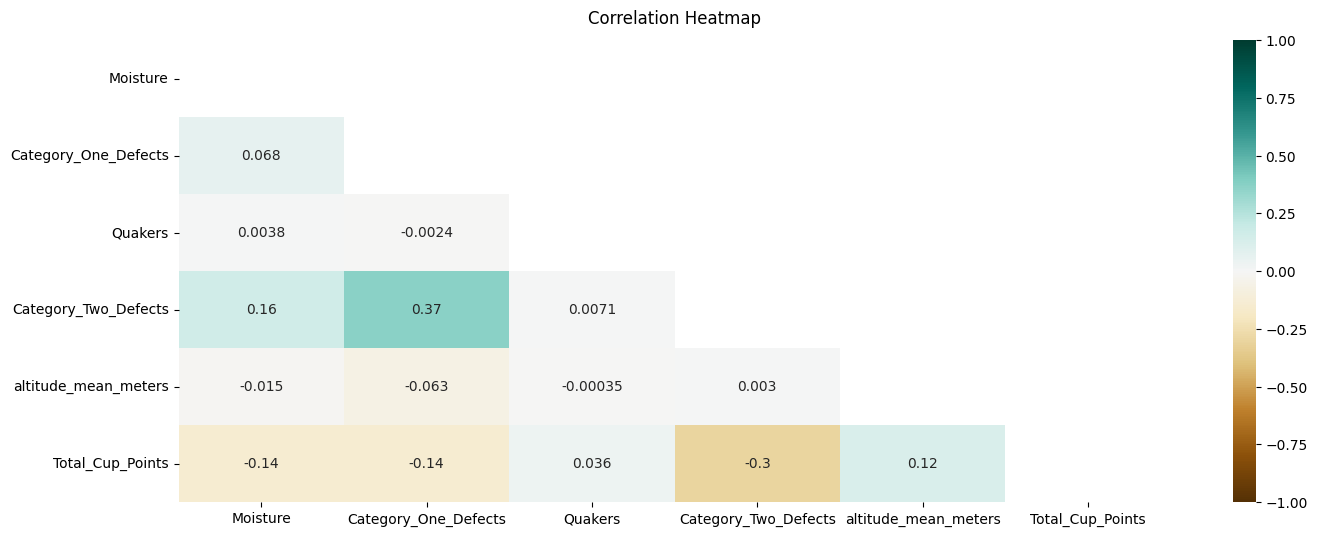

In [20]:
# ---- Correlation Plot ----
plt.figure(figsize=(16, 6))

correlation_matrix = data.corr()

mask = np.triu(np.ones_like(correlation_matrix, dtype=np.bool_))

heatmap = sns.heatmap(correlation_matrix, mask = mask,
                      vmin=-1, vmax=1, annot=True, cmap='BrBG')

heatmap.set_title('Correlation Heatmap', fontdict={'fontsize':12}, pad=12)

fig = heatmap.get_figure()

In the above correlation matrix, one can see that `Moisture` has the highest absolute correlation with `Total_Cup_Points`. The second highest correlation is with `Quakers`. All features except `Quakers` feature have a negative correlation with the target variable. `altitude_mean_meters` feature seems to have a weak correlation to the target although this feature will later on prove to still be useful in classification modelling. Feature importances will be explored during our modelling process to see if they match these results from EDA.

In [21]:
# ---- Box plot of Total_Cup_Points and Color ----
coffee_color_boxplot = alt.Chart(data).mark_boxplot().encode(
    x = alt.X('Total_Cup_Points', title = "Total quality rating (0-100 scale)"),
    y = alt.Y('Color', title = "Colour of coffee beans"))
coffee_color_boxplot_mean = coffee_color_boxplot + coffee_color_boxplot.mark_circle(fill='black',size=11).encode(x='mean(Total_Cup_Points)')
coffee_color_boxplot_mean

alt.LayerChart(...)

In [22]:
# ---- Scatter plots of numerical columns and Total_Cup_Points ----
numeric_cols = list(data.select_dtypes(exclude='object'))
scatter = (
    alt.Chart(data)
    .mark_point(opacity = 0.5, size = 0.5)
    .encode(
        x = alt.X(alt.repeat("repeat"), type = "quantitative", scale = alt.Scale(zero =  False)),
        y = alt.Y("Total_Cup_Points", scale = alt.Scale(zero = False))
    )
    .properties(height = 80, width = 80)
    .repeat(numeric_cols, columns = 3)
    .configure_axis(labelFontSize = 11)
)

scatter

alt.RepeatChart(...)

In [23]:
# ---- View counts of Good vs Poor coffee ----
class_data = data.copy()
class_data['Class'] = class_data['Total_Cup_Points'].apply(lambda x: 'Good' if x>82 else 'Poor')

fig = px.bar(class_data, x='Class')
fig.show()

#### **Modelling** <a class="anchor" id="model"></a>

Machine learning regression models like Ridge Regression and Random Forest Regression are applied on a few key variables, as indicated in the EDA analysis above, to satisfy the primary aim of predicting coffee quality (Pedregosa et al., 2011). Since the "target" variable for coffee evaluation was a continuous, numeric variable, regression analysis was our preferred method. The dataset's numerical characteristics are transformed using standard scaling and one-hot encoding is used to tranform the categorical features. Five-fold cross-validation is performed on both models and the average validation score is computed to determine which model best predicted the coffee quality. The hyperparameters are then optimised in the best model.

#### 4.1 Regression <a class="anchor" id="reg"></a>

In [24]:
# ---- Standard scaling of categorical features and One Hot Encoding of numerical features ----
numeric_features = [
    "Moisture",
    "Quakers",
    "altitude_mean_meters"
]

categorical_features = [
    "Region",
    "Harvest_Year",
    "Variety",
    "Processing_Method",
    "Category_One_Defects",
    "Color",
    "Category_Two_Defects"
    ]

preprocessor = make_column_transformer(
    (StandardScaler(), numeric_features),
    (OneHotEncoder(handle_unknown="ignore", sparse=False), categorical_features)
)

In [25]:
# ---- Split dataset into train and test sets ----
labels = data['Total_Cup_Points']
features = data.drop('Total_Cup_Points', axis=1)
X_train, X_test, y_train, y_test = train_test_split(features, labels, test_size = 0.20, random_state = 42)
print('Training Features Shape:', X_train.shape)
print('Training Labels Shape:', y_train.shape)
print('Testing Features Shape:', X_test.shape)
print('Testing Labels Shape:', y_test.shape)

Training Features Shape: (715, 10)
Training Labels Shape: (715,)
Testing Features Shape: (179, 10)
Testing Labels Shape: (179,)


In [26]:
# ---- A function to get cross-validated scores on the models ----

def mean_std_cross_val_scores(model, X_train, y_train, **kwargs):
    scores = cross_validate(model, X_train, y_train, **kwargs)

    mean_scores = pd.DataFrame(scores).mean()
    std_scores = pd.DataFrame(scores).std()
    out_col = []

    for i in range(len(mean_scores)):
        out_col.append((f"%0.3f (+/- %0.3f)" % (mean_scores[i], std_scores[i])))

    return pd.Series(data=out_col, index=mean_scores.index)


In [27]:
# ---- Ridge and Random Forest Regression ----
models = {
    "Ridge": Ridge(random_state=123),
    "RForest_Regressor": RandomForestRegressor(random_state=123)
}

results_dict = {}

for k, v in models.items():
    pipe_multi = make_pipeline(preprocessor, v)
    results_dict[k] = mean_std_cross_val_scores(pipe_multi, X_train, y_train, 
                                             cv=5, return_train_score=True)

results_dict = pd.DataFrame(results_dict)
results_dict

,Ridge,RForest_Regressor
fit_time,0.017 (+/- 0.005),0.596 (+/- 0.071)
score_time,0.006 (+/- 0.003),0.017 (+/- 0.003)
test_score,0.063 (+/- 0.098),0.077 (+/- 0.123)
train_score,0.333 (+/- 0.017),0.867 (+/- 0.010)


As seen from the results of cross-validation, both Ridge (R^2 score -0.063) and Random Forest Regression models (R^2 score 0.077) did not perform very well on the dataset. The Random Forest Regression model had a higher validation score than the Ridge model, so it was selected for hyperparameter optimization via the random search algorithm. This slightly improved the R^2 score to 0.28, as shown below.

In [28]:
# ---- Hyperparameter Optimization for RF Regressor Model ----

param_dist = {'randomforestregressor__max_depth': np.arange(1, 20),
              'randomforestregressor__max_features': np.arange(1, 124),
              'randomforestregressor__n_estimators': np.arange(100, 1000, 100)
             }

pipe = make_pipeline(preprocessor, RandomForestRegressor(random_state=123))

random_search = RandomizedSearchCV(
    pipe, param_distributions=param_dist, n_jobs=-1,
    n_iter=10, cv=5, random_state=123,
    return_train_score=True)

random_search.fit(X_train, y_train)
random_search.best_score_

0.14167196786885303

In [29]:
# ---- Inspect important features from best RF model ----

X_transformed = preprocessor.fit_transform(X_train)

column_names = (
    numeric_features +
    preprocessor.named_transformers_["onehotencoder"].get_feature_names_out().tolist()
)

# ---- Top 5 features ----
importances = random_search.best_estimator_['randomforestregressor'].feature_importances_
feat_df = pd.DataFrame({'features': column_names, 'importances': importances})
feat_df = feat_df.sort_values('importances', ascending=False)[:5]
fig = px.bar(feat_df, x='importances', y='features', title='Feature Importance from RF Regression')
fig.show()

Here, the important features are displayed from the best model from the random search in the above barplot. Altitude and moisture were the top 2 important features.

In [30]:
# ---- Performance on test set ----

random_search.score(X_test, y_test)

0.28014012393517096

#### 4.2 Classification <a class="anchor" id="class"></a>

Since the regression models produced R^2 scores of below 0.5, a Random Forest Classification was tested instead (Pedregosa et al. 2011) on the training data with some additional preprocessing. First, the numeric target variable `total_cup_points` is used to create a new variable `total_cup_grade` into two different classes: 'Good' and 'Poor' based on a median threshold. The former being scores higher than median score, and the latter being scores lower than median score (which is 82 out of 100).

In [31]:
# ---- Create a copy of the cleaned dataset ----
class_data = data.copy()

In [32]:
# ---- Create column for coffee grades ----
class_data['total_cup_grade'] = class_data['Total_Cup_Points'].apply(lambda x: 'Good' if x>82 else 'Poor')

In [33]:
# ---- Split the dataset into train and test datasets ----
labels_2 = class_data['total_cup_grade']
features_2 = class_data.drop(['Total_Cup_Points','total_cup_grade'], axis=1)
X_train_2, X_test_2, y_train_2, y_test_2 = train_test_split(features_2, labels_2, test_size = 0.20, random_state = 42)
print('Training Features Shape:', X_train_2.shape)
print('Training Labels Shape:', y_train_2.shape)
print('Testing Features Shape:', X_test_2.shape)
print('Testing Labels Shape:', y_test_2.shape)

Training Features Shape: (715, 10)
Training Labels Shape: (715,)
Testing Features Shape: (179, 10)
Testing Labels Shape: (179,)


In [34]:
# ---- Random Forest Classifier ----
pipe = make_pipeline(preprocessor, RandomForestClassifier(random_state=123))

results_dict['RForest_Classifier'] = pd.DataFrame(mean_std_cross_val_scores(pipe, X_train_2, y_train_2, cv=10, 
                                       return_train_score=True, scoring='roc_auc'))
results_dict

,Ridge,RForest_Regressor,RForest_Classifier
fit_time,0.017 (+/- 0.005),0.596 (+/- 0.071),0.271 (+/- 0.051)
score_time,0.006 (+/- 0.003),0.017 (+/- 0.003),0.020 (+/- 0.005)
test_score,0.063 (+/- 0.098),0.077 (+/- 0.123),0.685 (+/- 0.069)
train_score,0.333 (+/- 0.017),0.867 (+/- 0.010),0.999 (+/- 0.000)


The Random Forest Classifier model performed with cross-validation ROC score of 0.685. This model’s performance is better than the regression models as the test score on the test set was about 0.67.

In [35]:
# ---- Inspect important features from best RF model ----

pipe.fit(X_train_2, y_train_2)
pipe['randomforestclassifier'].feature_importances_

column_names = (
    numeric_features +
    preprocessor.named_transformers_["onehotencoder"].get_feature_names_out().tolist()
)

# ---- Top 5 features ----
importances = pipe['randomforestclassifier'].feature_importances_
feat_df = pd.DataFrame({'features': column_names, 'importances': importances})
feat_df = feat_df.sort_values('importances', ascending=False)[:5]
fig = px.bar(feat_df, x='importances', y='features', title='Feature Importance from RF Classifier')
fig.show()

Interestingly, the top 5 important features in this classifier included 3 similar features shown from the Random Forest Regressor model: altitude and moisture made it to the top 5 again. However, these results did not correlate to what we see from our initial EDA analysis above.

In [36]:
pipe.score(X_test_2, y_test_2)

0.6759776536312849

#### **Critique, Limitations and Future Improvements** <a class="anchor" id="clf"></a>

We faced several limitations in our analysis such as small dataset size (approximately thousand rows) and limited types of features available for feature engineering and modelling. In addition, many features had to be discarded due to their lack of relevance to our models. For example, features such as `aroma`, `flavour`, `aftertaste`, `acidity`, `body`, `balance`, `uniformity`, or `sweetness` were all discarded as they were just individual contributors to the calculation of the target variable (`total_cup_point`s).

We may enhance our model analysis by adding additional pertinent prediction traits or data. We might also experiment with including additional polynomial features and feature engineering, which involves joining existing features to create new ones. Further data-cleaning techniques might be used, such as the examination and elimination of outliers, as they can have a major impact on the performance of regression models. While we can see the benefits of utilizing classification models rather than regression models, we could also experiment with other classification models (Naive Bayes, Logistic Regression, etc.).

#### **References** <a class="anchor" id="ref"></a>

Association, National Coffee. n.d. "The Eocnomic Impact of the Coffee Industry." National Coffee Association. https://www.ncausa.org/Research-Trends/Economic-Impact.

Co., Starbucks Coffee. n.d. "The Origin of Coffee and It’s Cultivation." Starbucks.com.cn. https://www.starbucks.com.cn/coffee-blog/en/the-origin-of-coffee-and-its-cultivation.

Diepenbrock, George. 2015. "Demand for Coffee Can Create Rift with Poorer Nations." The University of Kansas. https://news.ku.edu/2015/08/05/demand-coffee-can-create-ecological-economic-rift-poorer-nations.

Mock, Thomas. n.d. "Tidytuesday/Readme.md at Master · Rfordatascience/Tidytuesday." GitHub. tidytuesday. https://github.com/rfordatascience/tidytuesday/blob/master/data/2020/2020-07-07/readme.md.

Pedregosa, F., G. Varoquaux, A. Gramfort, V. Michel, B. Thirion, O. Grisel, M. Blondel, et al. 2011. "Scikit-Learn: Machine Learning in Python." Journal of Machine Learning Research 12: 2825–30.

Xie, Yihui. 2021. Knitr: A General-Purpose Package for Dynamic Report Generation in r. https://yihui.org/knitr/.

Zhu, Hao. 2021. kableExtra: Construct Complex Table with 'Kable' and Pipe Syntax. https://CRAN.R-project.org/package=kableExtra.